In [4]:
import cv2
import matplotlib.patches as patches

import matplotlib.pyplot as plt
%matplotlib inline

# 讀取照片
image = cv2.imread('image/dog.jpg')

# 由於 cv2 在讀取照片時，會讀成 BGR，因此我們將其轉為 RGB
image = image[:,:,::-1]

#先將 BBOX 格式設為 (X, Y, W, H)，也就是座標以及 BBOX 的寬和高

In [5]:
ground_truth_bbox = [1900, 700, 1800, 1800]
prediction_bbox = [1800, 800, 1500, 1500]

轉為 (x0, y0, x1, y1)

In [6]:
ground_truth_bbox_transform = [ground_truth_bbox[0], ground_truth_bbox[1], ground_truth_bbox[0] + ground_truth_bbox[2], ground_truth_bbox[1] + ground_truth_bbox[3]]
prediction_bbox_transform = [prediction_bbox[0], prediction_bbox[1], prediction_bbox[0] + prediction_bbox[2], prediction_bbox[1] + prediction_bbox[3]]

C:\Users\x2206\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  if sys.path[0] == '':
C:\Users\x2206\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.
  if sys.path[0] == '':
C:\Users\x2206\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  from ipykernel import kernelapp as app
C:\Users\x2206\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher

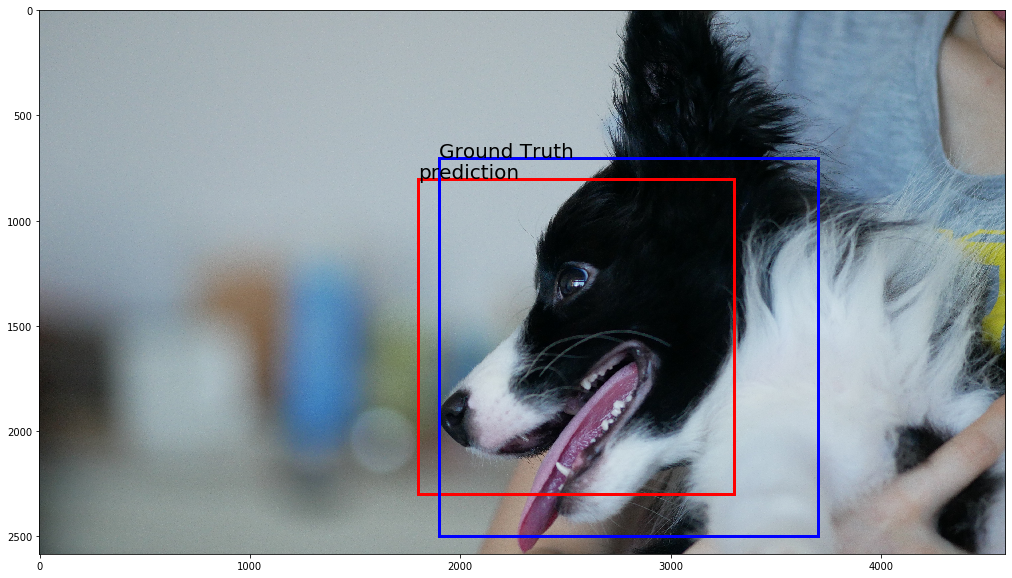

In [11]:
plt.rcParams['figure.figsize'] = (20, 10)


fig, axis = plt.subplots(1)

# 畫出圖片
axis.imshow(image)

# 畫 bbox prediction
rect = patches.Rectangle((prediction_bbox[0], prediction_bbox[1]), prediction_bbox[2], prediction_bbox[3], linewidth=3, edgecolor='r', facecolor='none')

axis.text(prediction_bbox[0], prediction_bbox[1], 'prediction', withdash=True, size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((ground_truth_bbox[0], ground_truth_bbox[1]), ground_truth_bbox[2], ground_truth_bbox[3], linewidth=3, edgecolor='b', facecolor='none')
axis.text(ground_truth_bbox[0], ground_truth_bbox[1], 'Ground Truth', withdash=True, size=20)

# Add the patch to the Axes
axis.add_patch(rect)
axis.add_patch(rect_1)

plt.show()

## 定義IOU計算

In [12]:
def bb_intersection_over_union(box_a, box_b):
    # determine the (x, y) coordinates of the intersection rectangle
    x_a = max(box_a[0], box_b[0])
    y_a = max(box_a[1], box_b[1])
    x_b = min(box_a[2], box_b[2])
    y_b = min(box_a[3], box_b[3])

    # The actual reason of adding 1 is because xB, xA both represent pixel coordinates. Suppose you have 6 pixels, the coordinates are from 0 to 5.  When you try to calculate the span of these 6 pixels, it should be  (5 - 0 + 1) = 6, there you have the extra 1.
    # 計算交集區域
    inter_area = max(0, x_b - x_a + 1) * max(0, y_b - y_a + 1)
    
    # 計算各自的BBOX大小
    box_a_area = (box_a[2] - box_a[0] + 1) * (box_a[3] - box_a[1] + 1)
    box_b_area = (box_b[2] - box_b[0] + 1) * (box_b[3] - box_b[1] + 1)
    
    # 計算 IOU
    iou = inter_area / (box_a_area + box_b_area - inter_area)

    # return the intersection over union value
    return iou

In [13]:
iou = bb_intersection_over_union(ground_truth_bbox_transform, prediction_bbox_transform)

In [10]:
print('IOU值：', iou) # 應該要得到0.6196482836879266